# Forecast the  Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# read an excel file and convert into a dataframe object
df = pd.DataFrame(pd.read_excel("Airlines+Data.xlsx"))
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

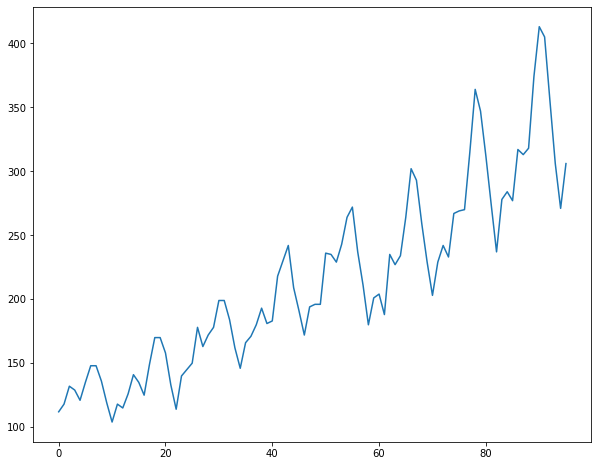

In [79]:
df.Passengers.plot()

In [80]:
# From above lineplot of Sales values, we can state that it have Upward Linear Trend With Multiplicative  Seasonality

<AxesSubplot:ylabel='Density'>

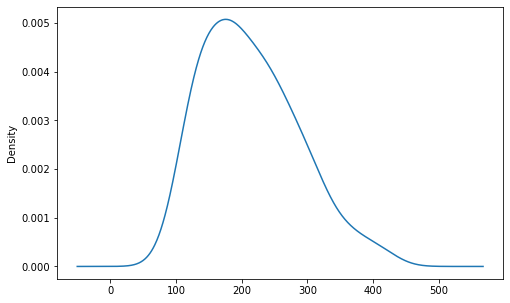

In [81]:
# Density Plot
df['Passengers'].plot(kind = 'kde', figsize=(8,5))

In [82]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")

df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction


In [40]:
df

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [41]:
# Getting dummy variables for months  
#for months 12 dummy variables are created here 
Months_Dummies = pd.DataFrame(pd.get_dummies(df['month']))
df = pd.concat([df,Months_Dummies],axis = 1)
df

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

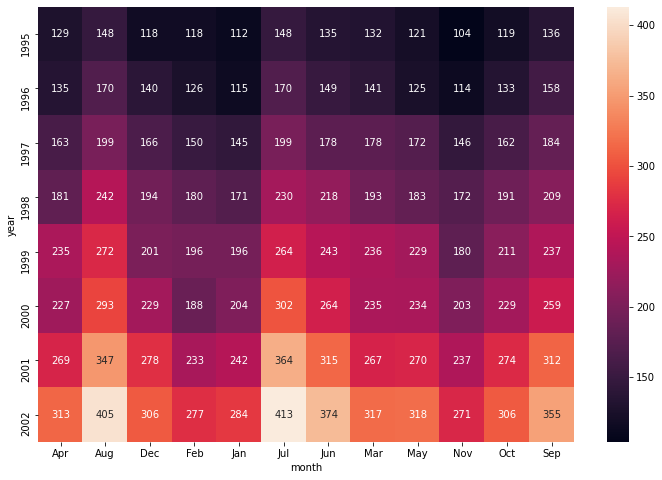

In [42]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

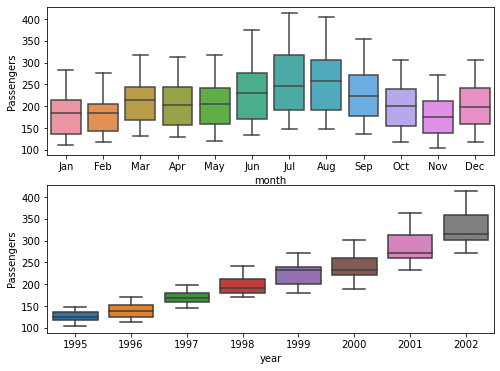

In [43]:
# Boxplot  
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)


In [44]:
#Max passengers are in month of July
#Max passengers in year 2002. 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

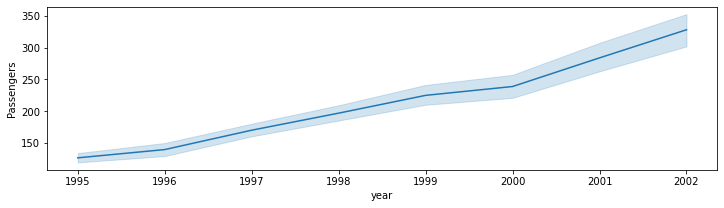

In [45]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

# Data Driven Forecasting Methods

In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [47]:
# Splitting data into Train and Test  
 

In [48]:
train = df.head(81)
test = df.tail(15)

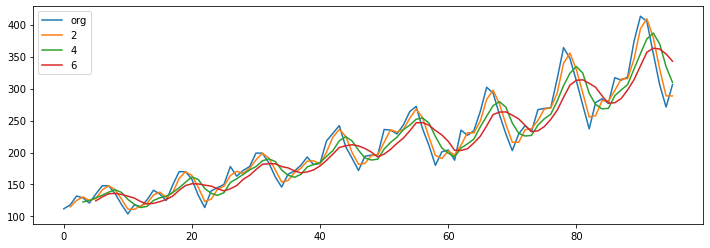

In [49]:
#Moving average method
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,8,2):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [50]:
#With windows = 2, we are getting less deviation of the forecasting values with original values

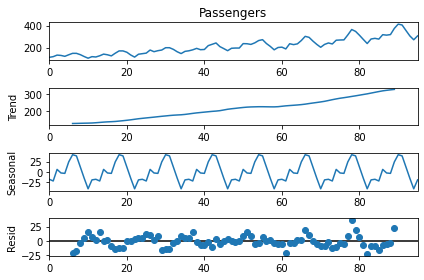

In [51]:
#Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [52]:
#Evaluation Metric RMSE
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [53]:
#Simple Exponential Method
import warnings
warnings.filterwarnings("ignore")

In [54]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_ses_model = RMSE(test.Passengers, pred_ses)
rmse_ses_model

49.39095730322309

In [55]:
#Holt method
hw_model = Holt(train["Passengers"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse_hw_model = RMSE(test.Passengers, pred_hw)
rmse_hw_model

48.22770039465261

In [56]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_add_model = RMSE(test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

23.289735706787013

In [57]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

14.159940511451667

# Final Model by combining train and test

In [58]:
hwe_model_mul_add = ExponentialSmoothing(df["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [59]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10) 

96     312.901603
97     308.173323
98     355.535710
99     345.772531
100    345.699577
101    392.474550
102    436.507418
103    429.865242
104    380.179283
105    332.322901
dtype: float64

# Model based Forecasting Methods


In [60]:
# Data preprocessing for models
df1=df.copy()
df1

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
df1["t"] = np.arange(1,97)
df1["t_squared"] = df1["t"]*df1["t"]

df1["log_psngr"] = np.log(df1["Passengers"])

df1
 

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_psngr
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [62]:
train = df1.head(81)
test = df1.tail(15)

In [63]:
import statsmodels.formula.api as smf

In [64]:
#linear
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.893893388955874

In [65]:
#Exponential

Exp = smf.ols('log_psngr~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

45.158505283733085

In [66]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

45.13675886301764

In [67]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea 

128.9085298585582

In [69]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_psngr~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.25851571846982

In [70]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_psngr~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.614465847647697

In [71]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,rmse_Mult_add_sea,9.614466
2,rmse_Quad,45.136759
1,rmse_Exp,45.158505
0,rmse_linear,47.893893
3,rmse_add_sea,128.908530
4,rmse_Mult_sea,135.258516


# we are getting lowest RMSE value for the Multiplicative Additive Seasonality model, we will use this as final model


In [ ]:
#Building final model with least RMSE value

In [72]:
predict_data=df1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]
predict_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t
0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0,1,0,0,0,0,0,0,0,0,0,3
3,0,0,0,1,0,0,0,0,0,0,0,0,4
4,0,0,0,0,1,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0,92
92,0,0,0,0,0,0,0,0,1,0,0,0,93
93,0,0,0,0,0,0,0,0,0,1,0,0,94
94,0,0,0,0,0,0,0,0,0,0,1,0,95


In [73]:
final_model = smf.ols('log_psngr~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = df1).fit()
pred_final_model = pd.Series(final_model.predict(predict_data))
pred_final_model 

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [74]:
pred_df = pd.DataFrame({'Actual' : df1.log_psngr, 'Predicted' : pred_final_model})
pred_df

,Actual,Predicted
0,4.718499,4.692963
1,4.770685,4.703487
2,4.882802,4.846666
3,4.859812,4.813814
4,4.795791,4.807291
...,...,...
91,6.003887,5.978339
92,5.872118,5.868100
93,5.723585,5.737989
94,5.602119,5.607538


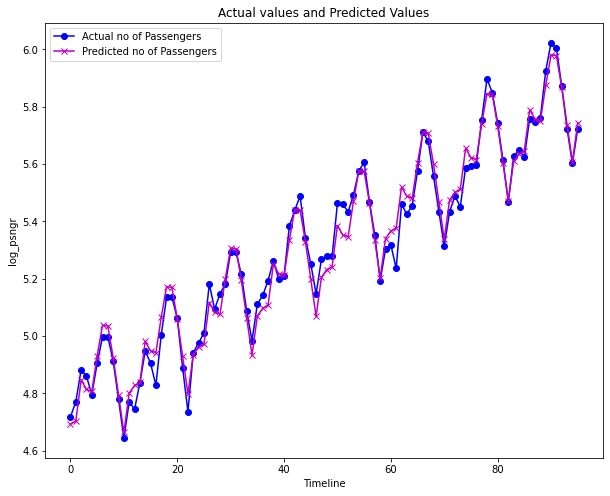

In [76]:
# Plot of Actual  values and Predicted  values
plt.plot(df1.log_psngr, color='b',marker='o', label='Actual no of Passengers')
plt.plot(pred_final_model, color='m',marker='x', label='Predicted no of Passengers')

plt.title('Actual values and Predicted Values')
plt.xlabel("Timeline")
plt.ylabel("log_psngr")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()